In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Размер тренировачных данных
train_df.shape

(891, 12)

In [4]:
# Размер тестовых данных
test_df.shape

(418, 11)

In [5]:
# Первые 5 строк
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Информация о столбцах
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Статистика по численным признкам
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


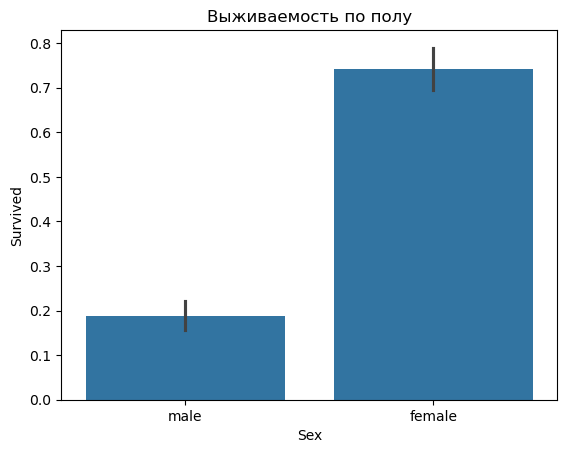

In [8]:
# Выживаемость по полу
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Выживаемость по полу')
plt.show()

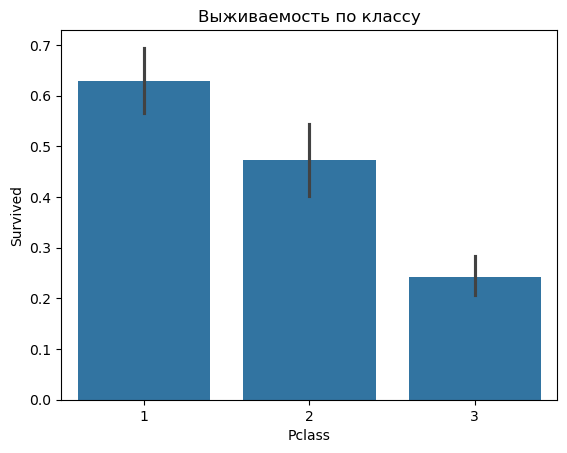

In [9]:
# Выживаемость по классу кают
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Выживаемость по классу')
plt.show()

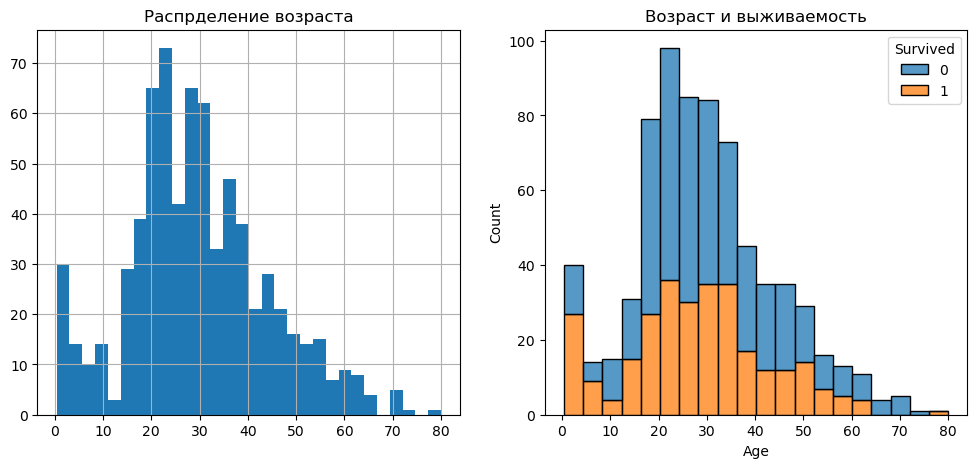

In [10]:
# Рспределение возраста
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
train_df['Age'].hist(bins=30)
plt.title('Распрделение возраста')
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')
plt.title('Возраст и выживаемость')
plt.show()

In [11]:
# Из мени извлекаем титул
train_df['Title'] = train_df['Name'].str.extract(' (A-Za-z)+\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Никита\AppData\Local\Temp\ipykernel_2684\2058649064.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' (A-Za-z)+\.', expand=False)


In [12]:
# Создаем признак "размер семьи"
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [13]:
# Создаем признак "одинокий пассжир"
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0

C:\Users\Никита\AppData\Local\Temp\ipykernel_2684\1708541082.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0
C:\Users\Никита\AppData\Local\Temp\ipykernel_2684\1708541082.py:3: Setti

In [14]:
# Из каюты извлекаем первую букву (палуба)
train_df['Deck'] = train_df['Cabin'].str[0]
deck_maping = {'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5', 'F': '6', 'G':'7', 'T':'8'}
train_df['Deck'] = train_df['Deck'].map(deck_maping)
train_df['Deck'] = train_df['Deck'].fillna(0)

In [15]:
# Заполняем возраст медианными значениями по полу и классу
train_df['Age'].isnull().sum()

177

In [16]:
# Заполняем пропущенную цену билета медианой
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median()))

In [17]:
#  Заполняем пропущенную цену билета медианой
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

In [18]:
# Заполняем порт посадки модой 
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [19]:
# One-Hot Encoding для пола, порта посадки 
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Emb'])

In [20]:
# Label encoding для титула
title_mapping = {'Mr': 1, 
                 'Miss': 2,
                 'Mrs': 3, 
                 'Master': 4, 
                 'Rare': 5}
train_df['Title'] = train_df['Title'].map(title_mapping) 
train_df['Title'] = train_df['Title'].fillna(0)

In [21]:
# Удаляем ненужные колонки
train_df = train_df.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# Разделение данных
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [24]:
# Разделяем на тренировочную выборку и валидирующую
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Пробуем разные модели
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train) # Обучение модели
    predictions = model.predict(X_val) # предсказания на валидационных данных
    accuracy = accuracy_score(y_val, predictions) # Оценка точности
    print(f'{name} Accuracy: {accuracy:.4f}')

c:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8045
Random Forest Accuracy: 0.7933


In [27]:
# Для Random Forest смотрим важность признаков
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
1,Age,0.231727
4,Fare,0.221126
9,Sex_female,0.140702
10,Sex_male,0.132262
0,Pclass,0.071046
8,Deck,0.063273
6,FamilySize,0.045749
2,SibSp,0.027693
3,Parch,0.022198
13,Emb_S,0.013731


In [29]:
# Валидация
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [30]:
# Из мени извлекаем титул
preprocessed_test_data = test_df
preprocessed_test_data['Title'] = preprocessed_test_data['Name'].str.extract(' (A-Za-z)+\.', expand=False)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Никита\AppData\Local\Temp\ipykernel_2684\1954844608.py:3: SyntaxWarning: invalid escape sequence '\.'
  preprocessed_test_data['Title'] = preprocessed_test_data['Name'].str.extract(' (A-Za-z)+\.', expand=False)


In [31]:
# Создаем признак "размер семьи"
preprocessed_test_data['FamilySize'] = preprocessed_test_data['SibSp'] + preprocessed_test_data['Parch'] + 1

In [32]:
# Создаем признак "одинокий пассжир"
preprocessed_test_data['IsAlone'] = 1
preprocessed_test_data['IsAlone'].loc[preprocessed_test_data['FamilySize'] > 1] = 0

C:\Users\Никита\AppData\Local\Temp\ipykernel_2684\3313447224.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  preprocessed_test_data['IsAlone'].loc[preprocessed_test_data['FamilySize'] > 1] = 0
C:\Users\Никита\AppData\Local\Temp\ipykernel

In [33]:
# Из каюты извлекаем первую букву (палуба)
preprocessed_test_data['Deck'] = preprocessed_test_data['Cabin'].str[0]
deck_maping = {'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5', 'F': '6', 'G':'7', 'T':'8'}
preprocessed_test_data['Deck'] = preprocessed_test_data['Deck'].map(deck_maping)
preprocessed_test_data['Deck'] = preprocessed_test_data['Deck'].fillna(0)


In [34]:
# Заполняем возраст медианными значениями по полу и классу
preprocessed_test_data['Age'].isnull().sum()

86

In [35]:
# Заполняем пропущенную цену билета медианой
preprocessed_test_data['Age'] = preprocessed_test_data.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median()))

In [36]:
#  Заполняем пропущенную цену билета медианой
preprocessed_test_data['Fare'] = preprocessed_test_data['Fare'].fillna(preprocessed_test_data['Fare'].median())

In [37]:
# Заполняем порт посадки модой 
preprocessed_test_data['Embarked'] = preprocessed_test_data['Embarked'].fillna(preprocessed_test_data['Embarked'].mode()[0])

In [38]:
# One-Hot Encoding для пола, порта посадки 
preprocessed_test_data = pd.get_dummies(preprocessed_test_data, columns=['Sex', 'Embarked'], prefix=['Sex', 'Emb'])

In [39]:
# Label encoding для титула
title_mapping = {'Mr': 1, 
                 'Miss': 2,
                 'Mrs': 3, 
                 'Master': 4, 
                 'Rare': 5}
preprocessed_test_data['Title'] = preprocessed_test_data['Title'].map(title_mapping) 
preprocessed_test_data['Title'] = preprocessed_test_data['Title'].fillna(0)

In [40]:
# Удаляем ненужные колонки
preprocessed_test_data = preprocessed_test_data.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1)

In [41]:
# Обучаем модель на всех тренировочных данных 
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [42]:
# Предсказываем для тестовых данных
test_predictions = final_model.predict(preprocessed_test_data)

In [43]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

In [44]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
submission.to_csv('titanic_submission.csv', index=False)